# COMP2200/COMP6200 Prac - Week 3

_Author: Benjamin Pope (benjamin.pope@mq.edu.au)_

---

In lectures this week we encountered ideas about data visualization, including histograms and scatter plots; and about distributions, including the normal distribution and the central limit theorem. 

Today we are going to explore the Monte Carlo method: using random numbers to estimate the properties of a distribution, and use this to illustrate some important distributions and the central limit theorem, and how to propagate uncertainties through calculations.

**Please submit the completed notebook for this workshop to your GitHub Classroom for marking!**

Remember that to use a notebook, you need to run each cell. If left side of a cell says `[ ]`, it hasn't been run. If the left side
says something like `[25]` then it has been. Shift-Enter runs a cell;  if you look around the user interface, various other menu items can run several cells in sequence.

In [1]:
#from operator import truediv

import numpy as np # maths
import matplotlib.pyplot as plt # plotting
import pandas as pd # data manipulation
import seaborn as sns # plotting

The `numpy` and `scipy` libraries have many functions for generating random numbers (as do many packages in many languages). Let's become familiar with some of the common functions, and take a tour through some of the important distributions:

- `np.random.rand()` generates a random number between 0 and 1
    - this is used to model continuous data that is uniformly distributed
- `np.random.binomial(n, p)` generates a random number from a binomial distribution with parameters `n` and `p`
    - this is used to model yes/no events like coin flips, where `n` is the number of flips and `p` is the probability of heads
- `np.random.beta(a, b)` generates a random number from a beta distribution with parameters `a` and `b`
    - this is used to model probabilities, where `a` and `b` are the number of successes and failures
- `np.random.randn()` generates a random number from a standard normal distribution (mean 0, standard deviation 1)
    - this is used to model continuous data that is normally distributed

Pseudorandom numbers in computing are generated by deterministic algorithms, where the next step is the application of an equation to the previous step.

We need to set 

- a seed for the random number generator, so that we can reproduce the same results each time we run the code
- the number of random numbers we want to generate

In this part of the exercise, you want to 

- try out what these look like with different seeds, and 
- see how the histograms converge to a uniform distribution as the number of random numbers increases.

In [2]:
# first let's simulate some uniform data

np.random.seed(2) # set the seed - play with changing this 

n = 100 # number of samples

# generate some random data
x = np.random.rand(n)
print(x)

[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678  0.33033482
 0.20464863 0.61927097 0.29965467 0.26682728 0.62113383 0.52914209
 0.13457995 0.51357812 0.18443987 0.78533515 0.85397529 0.49423684
 0.84656149 0.07964548 0.50524609 0.0652865  0.42812233 0.09653092
 0.12715997 0.59674531 0.226012   0.10694568 0.22030621 0.34982629
 0.46778748 0.20174323 0.64040673 0.48306984 0.50523672 0.38689265
 0.79363745 0.58000418 0.1622986  0.70075235 0.96455108 0.50000836
 0.88952006 0.34161365 0.56714413 0.42754596 0.43674726 0.77655918
 0.53560417 0.95374223 0.54420816 0.08209492 0.3663424  0.8508505
 0.40627504 0.02720237 0.24717724 0.06714437 0.99385201 0.97058031
 0.80025835 0.60181712 0.76495986 0.16922545 0.29302323 0.52406688
 0.35662428 0.04567897 0.98315345 0.44135492 0.50400044 0.32354132
 0.25974475 0.38688989 0.8320169  0.73674706 0.37921057 0.01301734
 0.79740494 0.2693888  0.58268489 0.02555094 0.66220202 0.38752343
 0.4970738  0.41490584 0.3508719  0.55097791 0.97291069 0.11277

In the next cell, plot a time series of these random samples - are they correlated?

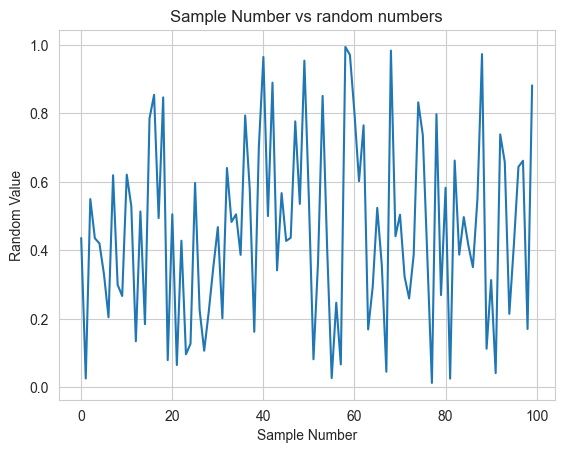

In [3]:
plt.plot(x)
plt.xlabel('Sample Number')
plt.ylabel('Random Value')
plt.title('Sample Number vs random numbers')
plt.show()

In [4]:
#plt.plot(range(n), x, marker='o')
#plt.xlabel('Sample Index')
#plt.ylabel('Random Value')
#plt.title('Time Series of Random Samples')
#plt.show()

After looking at the values you can see that there is no relation between them.

Let's make a histogram:

(array([12.,  9.,  9., 12., 15., 14.,  8.,  8.,  7.,  6.]),
 array([0.01301734, 0.1111008 , 0.20918427, 0.30726774, 0.40535121,
        0.50343467, 0.60151814, 0.69960161, 0.79768508, 0.89576854,
        0.99385201]),
 <BarContainer object of 10 artists>)

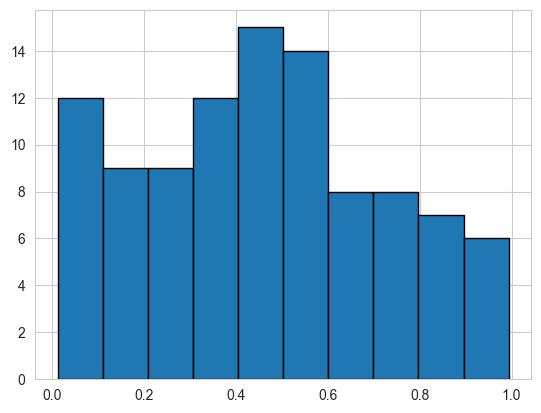

In [5]:
plt.hist(x , bins=10, edgecolor='black')

In [6]:
#plt.hist(x, bins=10, edgecolor='black')
#plt.xlabel('Random Value')
#plt.ylabel('Frequency')
#plt.title('Histogram of Random Samples')
#plt.show()

There is also a family of functions in `scipy.stats` for statistics, which can draw samples but also calculate probability densit functions (PDFs), cumulative distribution functions (CDFs), and more.

In [7]:
from scipy import stats

To generate samples, we use the `.rvs()` method, which stands for "random variates".

In [14]:
draws = stats.uniform.rvs(size=10, random_state=2) # see that with the same seed we get the same data as numpy
print(draws)
# we use rvd to generate random number but from scipy library

[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678  0.33033482
 0.20464863 0.61927097 0.29965467 0.26682728]


In this section, edit this to show that as you increase the size of the draw, you approach the expected distribution more and more closely.

How big does the draw need to be for all bins to be within 1% of the expected value?

Answer: The size of the draw should be 100000 for all  to be withing the mentioned limit.

[5.50797903e-01 7.08147823e-01 2.90904739e-01 5.10827605e-01
 8.92946954e-01 8.96293089e-01 1.25585310e-01 2.07242878e-01
 5.14672033e-02 4.40809844e-01 2.98762109e-02 4.56833224e-01
 6.49144048e-01 2.78487283e-01 6.76254902e-01 5.90862817e-01
 2.39818824e-02 5.58854088e-01 2.59252447e-01 4.15101197e-01
 2.83525082e-01 6.93137918e-01 4.40453718e-01 1.56867738e-01
 5.44649018e-01 7.80314765e-01 3.06363532e-01 2.21957884e-01
 3.87971258e-01 9.36383650e-01 9.75995422e-01 6.72383676e-01
 9.02834109e-01 8.45750871e-01 3.77994041e-01 9.22170089e-02
 6.53410903e-01 5.57840762e-01 3.61564763e-01 2.25054505e-01
 4.06519916e-01 4.68940249e-01 2.69235578e-01 2.91792774e-01
 4.57686399e-01 8.60533913e-01 5.86252904e-01 2.83487862e-01
 2.77977507e-01 4.54622076e-01 2.05410345e-01 2.01378711e-01
 5.14035060e-01 8.72293688e-02 4.83585532e-01 3.62176212e-01
 7.07686622e-01 7.46746223e-01 6.91092922e-01 6.89180414e-01
 3.73600124e-01 6.68134805e-01 3.39848664e-01 5.72793870e-01
 3.25807158e-01 4.451450

(0.0, 1.0)

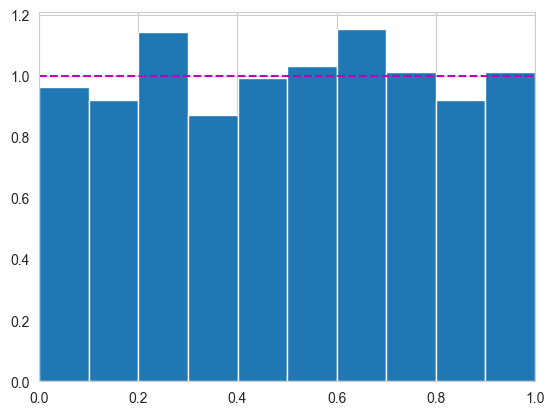

In [19]:
#increased the sample size = 1000
dist = stats.uniform() # scipy is object-oriented, so we need to create an object to work with
# we are using uniform distribution method and storing it in dist variable to create a random number using rvs method, or we can directly use just like the last cell
draws = dist.rvs(size=1000, random_state=3) # see that with the same seed we get the same data as numpy
#random state is seed
print(draws)
#
x = np.linspace(0, 1, 1000)
#plot number from range of 0-1 and plot 1000 number
pdf = dist.pdf(x) # probability density function
# it gives the probability of getting a number within a specified range
#hisotgrma takes continuous value but give discrete value

plt.hist(draws,density=True) # density=True normalizes the histogram
#density = true will give you almost the same height bins
plt.plot(x, pdf, 'm--')
plt.xlim(0,1)

(0.0, 1.0)

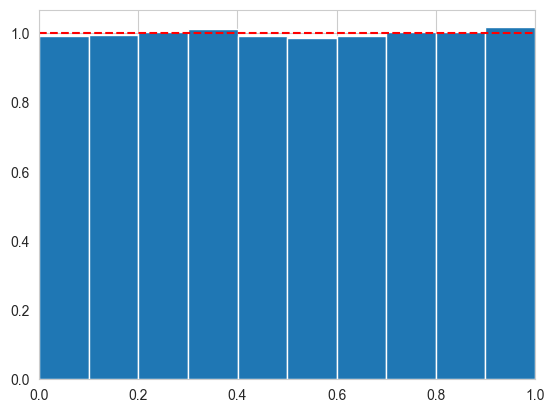

In [22]:
dist = stats.uniform() # scipy is object oriented, so we need to create an object to work with
draws = dist.rvs(size=100000, random_state=3) # see that with the same seed we get the same data as numpy
x = np.linspace(0, 1, 1000)
pdf = dist.pdf(x) # probability density function

plt.hist(draws,density=True) # density=True normalizes the histogram
plt.plot(x, pdf, 'r--')
plt.xlim(0,1)

You can also calculate the *cumulative distribution function* (CDF) of the data, which is the probability that a random variable is less than or equal to a certain value. This is most vitally important for calculating p-values in hypothesis testing.

(0.0, 1.0)

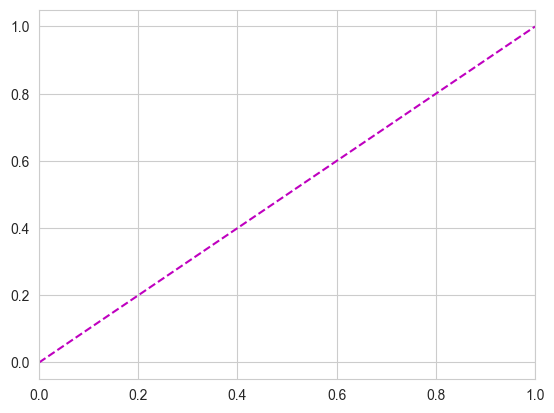

In [24]:
cdf = dist.cdf(x) # cumulative density function
#plot that using CDF
plt.plot(x, cdf, 'm--')
plt.xlim(x.min(), x.max())

Let's consider a few other distributions:
- exponential 
- Poisson
- binomial

The exponential distribution represents the waiting time between discrete events that occur at random but at a constant average rate. 

This can represent

- bus arrival times
- radioactive decay
- shot noise in electronics or photon counting optics
- raindrops hitting a window

1.0


(0.0, 10.0)

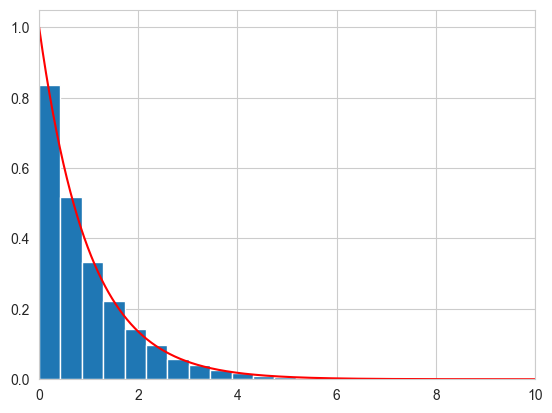

In [27]:
dist = stats.expon(scale=1) # exponential distribution with scale=1
# the mean of exponential dist is equal to the scale parameter, so the mean is 1
# - The exponential distribution is commonly used to model the time between events that occur at a constant rate
print(dist.mean())

draws = dist.rvs(size=10000, random_state=3) # see that with the same seed we get the same data as numpy
x = np.linspace(0, 10, 1000)
pdf = dist.pdf(x) # probability density function

plt.hist(draws,density=True,bins=20) # density=True normalizes the histogram
plt.plot(x, pdf, 'r-')
plt.xlim(0,10)

What does the CDF look like?

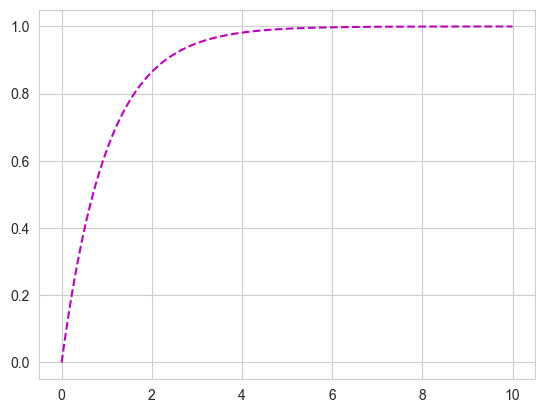

In [28]:
plt.plot(x, dist.cdf(x), 'm--')
#opp dirn plot

There is an amazing trick with CDFs: if you take the inverse of the CDF, you can generate random numbers from that distribution by looking up the value of the CDF at a random number between 0 and 1. You can do this with the `.ppf()` method, which stands for "percent point function" - this calculates what value the percentiles of the distribution correspond to.

This is how a lot of the functions in `scipy` generate random variates under the hood. This is called the *inverse transform method*. Let's try this:

(0.0, 5.5)

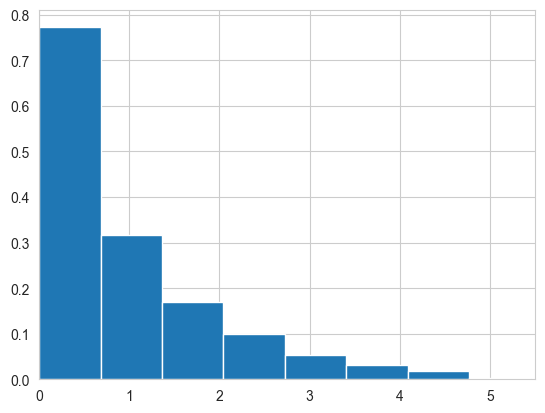

In [30]:
uniform_samples = np.random.rand(1000)
plt.hist(dist.ppf(uniform_samples), density=True , bins=10)
plt.xlim(0,5.5)
#what value of percentile

(0.0, 5.5)

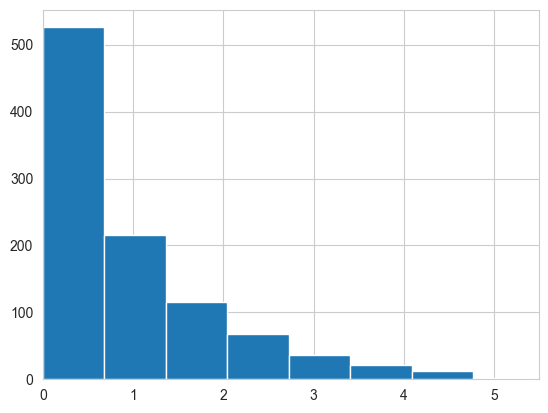

In [35]:
plt.hist(dist.ppf(uniform_samples), bins=10)
plt.xlim(0,5.5)
#without density = True

There are also convenience functions for calculating summary statistics like the mean and standard deviation exactly, without having to draw samples:

In [37]:
print("mean",dist.mean(), "sigma",dist.var())
# mean is 1 as a scale of exponential distribution is 1 check above steps for more.

mean 1.0 sigma 1.0


These are vectorized, so if you pass it a range of parameters, it will return a range of results. Let's plot this to see how the mean varies with $a$ and $b$:

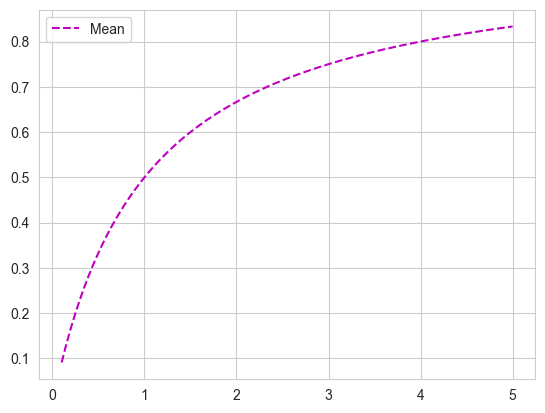

In [44]:
a = np.linspace(0.1, 5, 100)
dsit =stats.beta(a=a, b=1) #varing a
means = dsit.mean()
plt.plot(a, means,"m--", label='Mean')
plt.legend()

This is closely related to a discrete distribution: the Poisson distribution, which is the probability of getting a number of events arriving at random at a fixed rate called $\lambda$ or $\mu$ (ie like in the exponential distribution) *over a fixed interval of time*.

Play with the mean value: for small samples this is very lumpy and discrete, but for large count rates it is converging to something very familiar!

Why do you think this is?

*Answer*: It's because mean value is directly affected by the "location parameter" 'b' where as mean is independent of "scale parameter" 'a'.

[5 1 1 ... 4 4 4]
[0 1 2 3 4 5 6 7 8]


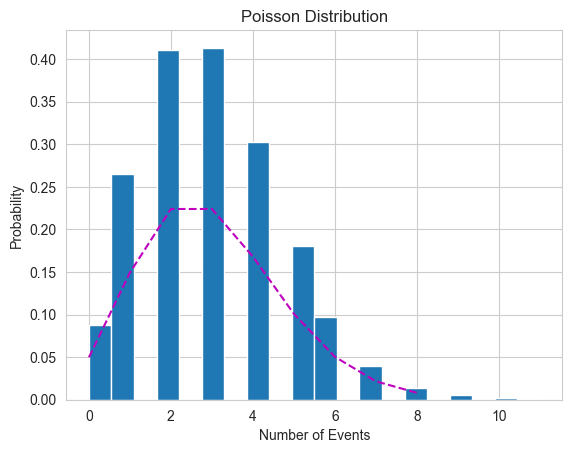

In [54]:
rate = 3 #mu is = 3 that's why the rate is 3 we have to see poisson distribution
dist = stats.poisson(mu=rate) # poisson distribution with mu=3
draws = dist.rvs(size=10000, random_state=3) # see that with the same seed we get the same data as numpy
print(draws)
x = np.arange(0, np.round(rate*3))
#x = np.arange(0, max(draws) + 1) # Adjust the range to include the maximum value in draws
print(x)
pmf = dist.pmf(x) # probability mass function for discrete distributions
# just like cdf ppf this is for discrete value while cdf and ppf are for continues distribution
plt.hist(draws,density=True,bins=20) # density=True normalizes the histogram
plt.plot(x, pmf, 'm--')
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.title("Poisson Distribution")
plt.show()

In the next cell, plot how the mean and standard deviation of a Poisson distribution vary with the rate parameter $\lambda$.

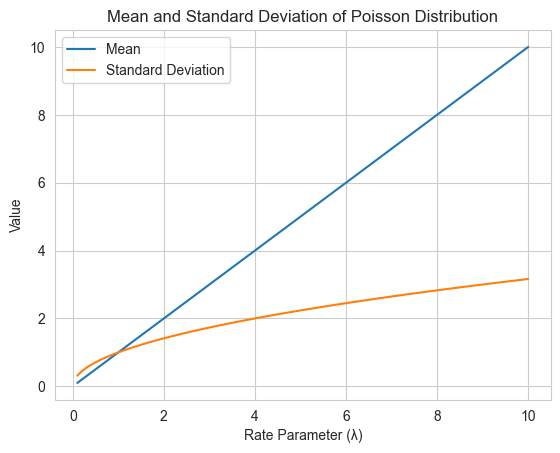

In [58]:
lambdas = np.linspace(0.1, 10, 100) #generate an array of rate parameter
means = lambdas  # mean of Poisson is equal to lambda
std_devs = np.sqrt(lambdas)  # standard deviation of Poisson is sqrt(lambda) and we are using np to do that

plt.plot(lambdas, means, label='Mean')
#plt.show()
plt.plot(lambdas, std_devs, label='Standard Deviation')
plt.xlabel('Rate Parameter (λ)')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation of Poisson Distribution')
plt.legend()
plt.show()

BONUS QUESTION: can you show numerically that the Poisson distribution is the distribution of the number of events in a fixed interval of time if the events are exponentially distributed in time?

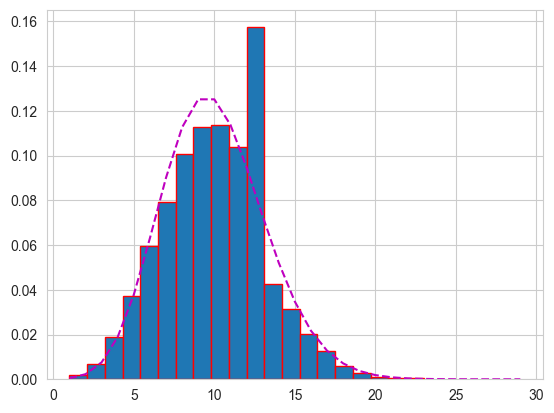

In [59]:
rate = 10
dist = stats.expon(scale=1/rate) #expo distribution with scale=1/rate
draws = dist.rvs(size=100000, random_state=3) # same seed same data
time =np.cumsum(draws)
# cumulative sum function

#count the number of events in bins of length 1 2 3 using modulo %

modulo = time % 1.0
diff = np.diff(modulo)
blocks = np.argwhere(diff < 0).flatten() #

plt.hist(np.diff(blocks), bins=20, density= True, edgecolor='red')
plt.plot(np.arange(1, rate*3), stats.poisson(rate).pmf(np.arange(1, rate * 3)), 'm--')

In [60]:
#interval_length = 100
#rate = 3  # Poisson rate (λ)
#num_intervals = 10000

# Generate exponential inter-arrival times
#exp_draws = np.random.exponential(1/rate, size=(num_intervals, interval_length))
#event_counts = (exp_draws.sum(axis=1) <= interval_length).sum(axis=0)

# Compare to Poisson distribution
#poisson_dist = stats.poisson(mu=rate)
#x = np.arange(0, np.max(event_counts) + 1)
#pmf = poisson_dist.pmf(x)

#plt.hist(event_counts, density=True, bins=np.arange(-0.5, x.max() + 1.5, 1), label="Simulated", alpha=0.7)
#plt.plot(x, pmf, 'r-o', label="Poisson PMF")
#plt.xlabel("Number of Events")
#plt.ylabel("Probability")
#plt.title("Comparison of Simulated and Poisson Distribution")
#plt.legend()
#plt.show()


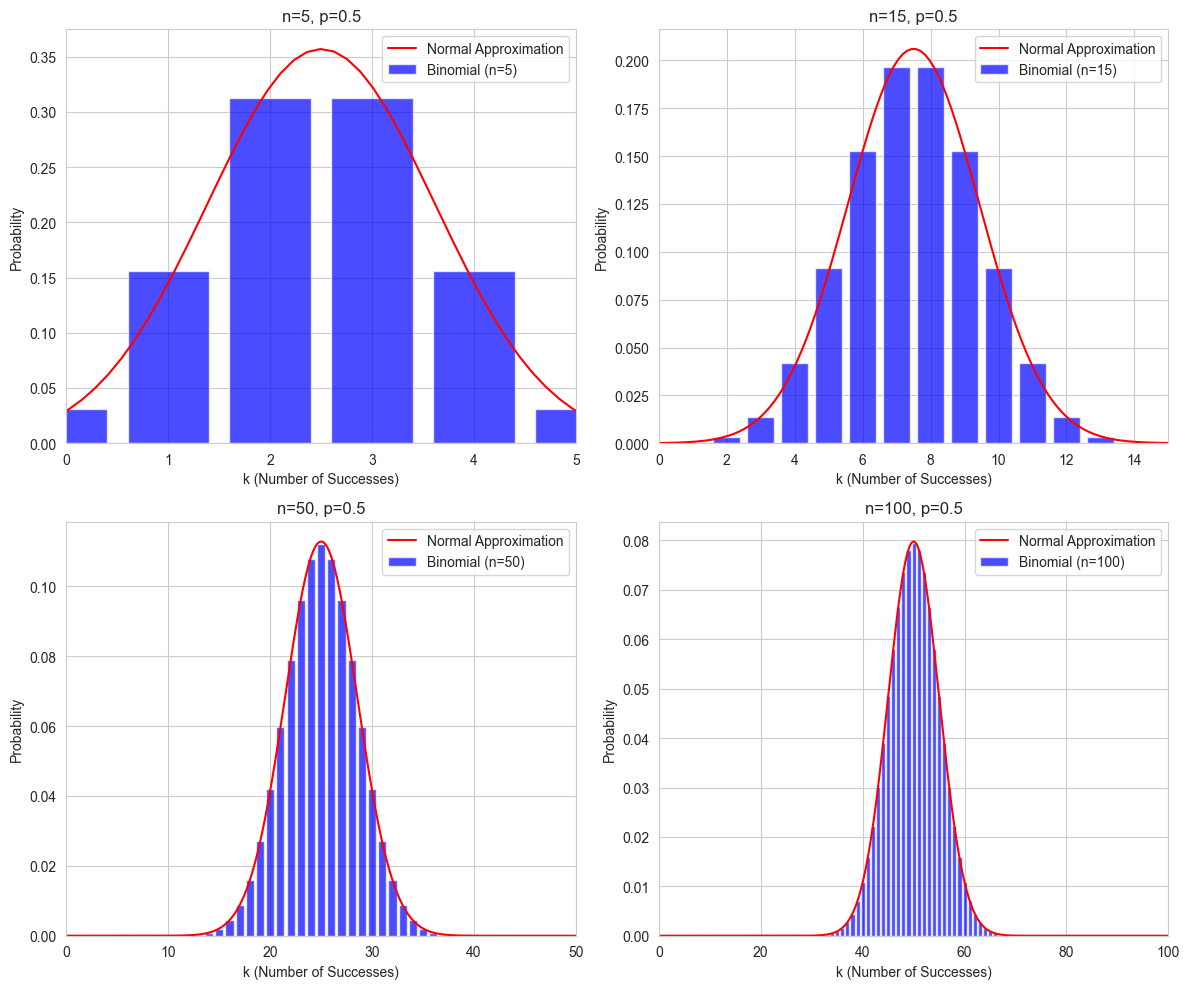

In [61]:
n_values = [5, 15, 50, 100]
p = 0.5
x = np.linspace(-10, 120, 1000)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, n in enumerate(n_values):
    binom_dist = stats.binom(n=n, p=p)
    mean, std_dev = binom_dist.mean(), binom_dist.std()
    normal_dist = stats.norm(loc=mean, scale=std_dev)

    x_vals = np.arange(0, n + 1)
    pmf = binom_dist.pmf(x_vals)
    normal_pdf = normal_dist.pdf(x)

    axes[i].bar(x_vals, pmf, alpha=0.7, label=f'Binomial (n={n})', color='blue')
    axes[i].plot(x, normal_pdf, 'r-', label='Normal Approximation')
    axes[i].set_title(f'n={n}, p={p}')
    axes[i].set_xlabel('k (Number of Successes)')
    axes[i].set_ylabel('Probability')
    axes[i].legend()
    axes[i].set_xlim(0, n)

plt.tight_layout()
plt.show()

There are many more distributions implemented in `scipy.stats`, but one of the most important is the binomial distribution, which is the probability of getting $k$ successes in $n$ trials, each with probability $p$ of success. This models the number of heads in $n$ coin flips ($p=0.5$), or ($p = 1/6$) the number of times a die comes up 6 in $n$ rolls.

Check how this varies with $n$ and $p$. You'll notice that for small $n$ this is very blocky - but for large $n$ it is converging to something very familiar!

Why do you think this is?

*Answer*: Center Limit Theorem
1. When (n) is small, there are only a few possible outcomes for the number of successes (k), making the distribution discrete and "blocky."

2. As the number of trials \(n\) in a binomial distribution increases, the distribution becomes smoother and starts resembling a normal (Gaussian) distribution due to the Central Limit Theorem. This convergence occurs because the sum of many independent random outcomes approximates a normal distribution.

(5.0, 35.0)

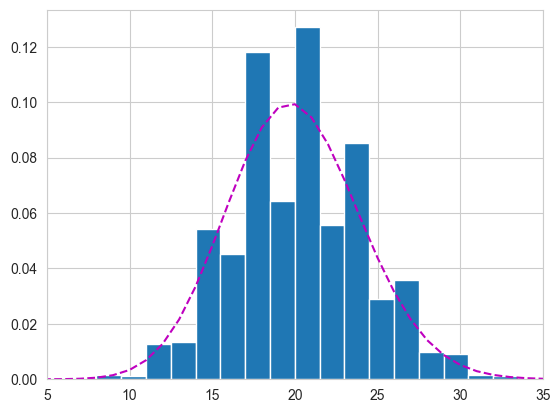

In [62]:
n, p = 100, 0.2
dist = stats.binom(n=n, p=p) # binomial distribution with n trials and p probability
draws = dist.rvs(size=10000, random_state=3) 
x = np.arange(0, np.max([np.round(n*p*2),np.max(draws)]))
pmf = dist.pmf(x) # probability mass function = probability density function for discrete distributions

plt.hist(draws,density=True,bins=20) # density=True normalizes the histogram
plt.plot(x, pmf, 'm--')
plt.xlim(5,35)


In the next cell, plot how the mean and standard deviation of a binomial distribution vary with the number of trials $n$ for some different values of $p$ of your choice.

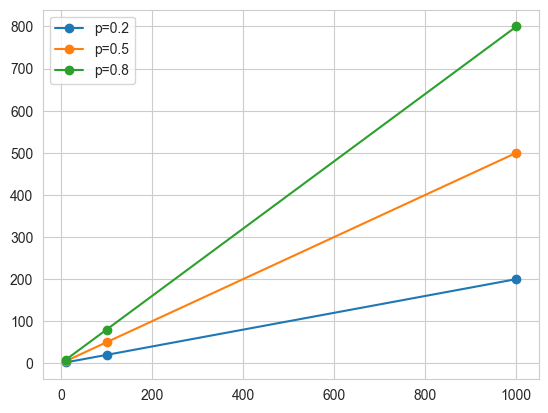

In [63]:
ns = [10, 100, 1000]
ps = [0.2, 0.5, 0.8]

for p in ps:
    dist = stats.binom(n=ns, p=p) # binomial distribution with n trials and p probability
    plt.plot(ns, dist.mean(), 'o-', label=f'p={p}')
plt.legend()

## The Central Limit Theorem

In class we talked about the central limit theorem: the sum of a large number of independent random variables is approximately normally distributed, and that you have mean and standard deviation 

$$
\mu = N \times \mu_0, \quad \sigma = \sqrt{N} \times \sigma_0
$$

The previous sections showed that this comes naturally out of large samples from Poisson or binomial distributions. 

Here's how we can draw from normal distributions:

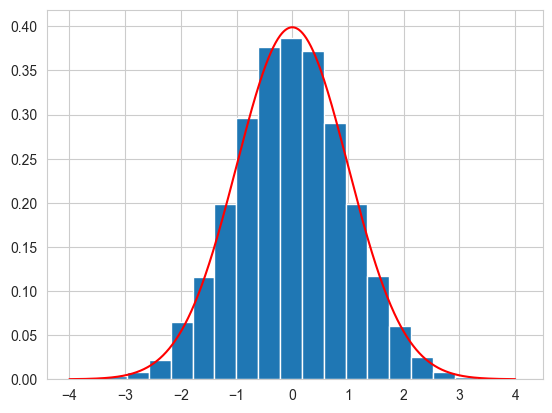

In [64]:
mu, sig = 0, 1
dist = stats.norm(mu, sig) # normal distribution with mean=0 and sigma=1
draws = dist.rvs(size=10000, random_state=3) 
x = np.linspace(mu-4*sig, mu+4*sig, 1000) # this is a formula so we can't change it
pdf = dist.pdf(x) # probability mass function = probability density function for discrete distributions

plt.hist(draws,density=True,bins=20) # density=True normalizes the histogram
plt.plot(x, pdf, 'r-')


In the next cell, use the analytic distribution means and variances to demonstrate the central limit theorem holds for:

- sum of N draws from uniform distributions
- sum of N draws frmo exponential distributions
- sum of N draws from uniform  and M draws from exponential distributions

and quantify how big N and M need to be for the central limit theorem to hold.

In [65]:
# this can be done a bunch of ways but seee by eye that yey hae shown for small change

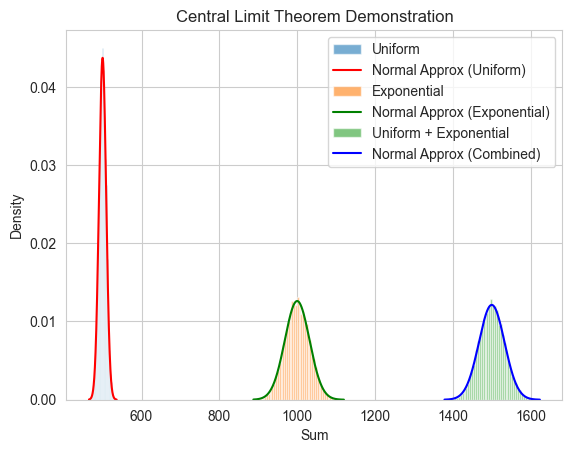

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, expon, norm

def central_limit_theorem_demo():
    N, M = 1000, 1000  # Number of draws from uniform and exponential distributions
    trials = 10000  # Number of trials for the sum

    # Sum of N draws from uniform distribution
    uniform_sums = np.sum(uniform.rvs(size=(trials, N), random_state=1), axis=1)
    plt.hist(uniform_sums, bins=50, density=True, alpha=0.6, label="Uniform")

    # Analytic normal distribution for uniform sums
    uniform_mean = N * 0.5  # Mean of uniform(0, 1) is 0.5
    uniform_var = N * (1/12)  # Variance of uniform(0, 1) is 1/12
    x = np.linspace(uniform_sums.min(), uniform_sums.max(), 1000)
    plt.plot(x, norm.pdf(x, loc=uniform_mean, scale=np.sqrt(uniform_var)), 'r-', label="Normal Approx (Uniform)")

    # Sum of N draws from exponential distribution
    exp_sums = np.sum(expon.rvs(size=(trials, N), random_state=2), axis=1)
    plt.hist(exp_sums, bins=50, density=True, alpha=0.6, label="Exponential")

    # Analytic normal distribution for exponential sums
    exp_mean = N * 1  # Mean of expo(λ=1) is 1
    exp_var = N * 1  # Variance of expo(λ=1) is 1
    x = np.linspace(exp_sums.min(), exp_sums.max(), 1000)
    plt.plot(x, norm.pdf(x, loc=exp_mean, scale=np.sqrt(exp_var)), 'g-', label="Normal Approx (Exponential)")

    # Sum of N draws from uniform and M draws from exponential distributions
    combined_sums = np.sum(uniform.rvs(size=(trials, N), random_state=3), axis=1) + \
                    np.sum(expon.rvs(size=(trials, M), random_state=4), axis=1)
    plt.hist(combined_sums, bins=50, density=True, alpha=0.6, label="Uniform + Exponential")

    # Analytic normal distribution for combined sums
    combined_mean = uniform_mean + exp_mean  # Sum of means
    combined_var = uniform_var + exp_var  # Sum of variances (independent variables)
    x = np.linspace(combined_sums.min(), combined_sums.max(), 1000)
    plt.plot(x, norm.pdf(x, loc=combined_mean, scale=np.sqrt(combined_var)), 'b-', label="Normal Approx (Combined)")

    plt.legend()
    plt.title("Central Limit Theorem Demonstration")
    plt.xlabel("Sum")
    plt.ylabel("Density")
    plt.show()

central_limit_theorem_demo()

One *vitally important* use for the normal distribution is in hypothesis testing - so the cumulative distribution function of the normal has a special name, the error function, and is implemented in `scipy.special`.

The error function is the integral of the normal distribution, and is used to calculate the probability that a random variable is within a certain range. In particular, everybody in stats will use $1\sigma$, $2\sigma$, and $3\sigma$ intervals as quantiles.

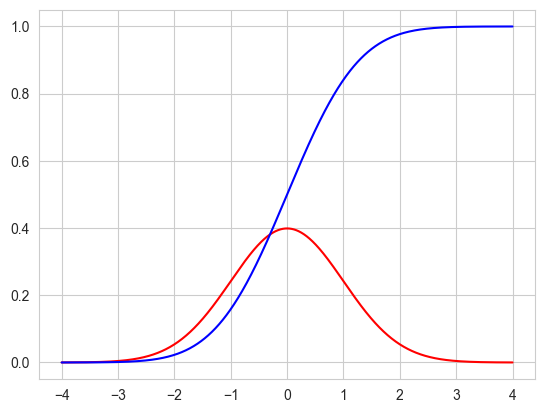

In [67]:
mu, sig = 0, 1
dist = stats.norm(mu, sig) # normal distribution with mean=0 and sigma=1

x = np.linspace(mu-4*sig, mu+4*sig, 1000)
pdf = dist.pdf(x) # probability mass function = probability density function for discrete distributions
cdf = dist.cdf(x) # cumulative density function
plt.plot(x, pdf, 'r-')
plt.plot(x, cdf, 'b-')

In the next cell, calculate the 1, 2, 3, 4, 5 $\sigma$ quantiles for a normal distribution. How frequent are "5-sigma" events?

In [68]:
from scipy.stats import norm

# Standard normal distribution
mu, sigma = 0, 1
dist = norm(mu, sigma)

# Calculate quantiles
sigma_levels = [1, 2, 3, 4, 5]
quantiles = [dist.cdf(mu + s * sigma) - dist.cdf(mu - s * sigma) for s in sigma_levels]

# Frequencies of events outside each sigma level
frequencies = [1 - q for q in quantiles]

# Display results
for s, q, f in zip(sigma_levels, quantiles, frequencies):
    print(f"{s}-sigma quantile: {q:.10f}, Frequency of events outside: {f:.10e}")

1-sigma quantile: 0.6826894921, Frequency of events outside: 3.1731050786e-01
2-sigma quantile: 0.9544997361, Frequency of events outside: 4.5500263896e-02
3-sigma quantile: 0.9973002039, Frequency of events outside: 2.6997960633e-03
4-sigma quantile: 0.9999366575, Frequency of events outside: 6.3342483666e-05
5-sigma quantile: 0.9999994267, Frequency of events outside: 5.7330314385e-07


## Multivariate Distributions

We can also consider multivariate distributions, where we have more than one random variable. Let's consider the multivariate normal, in 2D.

(np.float64(-3.195330262765032),
 np.float64(2.955704978626009),
 np.float64(-2.647944798940449),
 np.float64(2.387010967818698))

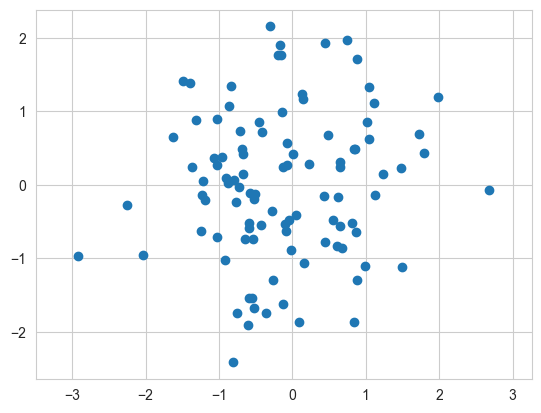

In [69]:
mu = [0, 0]
cov = [[1, 0], [0, 1]]
dist = stats.multivariate_normal(mean=mu, cov=cov)
draws = dist.rvs(size=100, random_state=3)

plt.scatter(draws[:,0],draws[:,1])
plt.axis('equal')

We can make this into a `pd` dataframe and plot it as a corner plot:

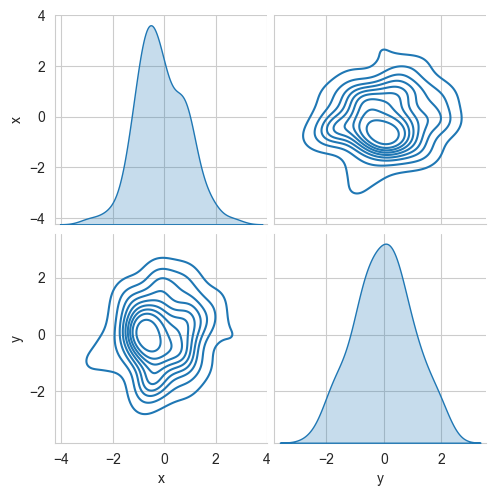

In [70]:
df = pd.DataFrame(draws, columns=['x', 'y'])
sns.pairplot(df, kind='kde') # play with this - try kind='scatter', 'kde', or 'hist'

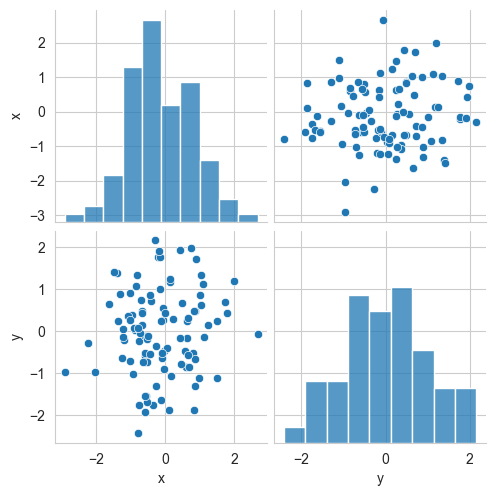

In [71]:
df = pd.DataFrame(draws, columns=['x', 'y'])
sns.pairplot(df, kind='scatter') # play with this - try kind='scatter', 'kde', or 'hist'

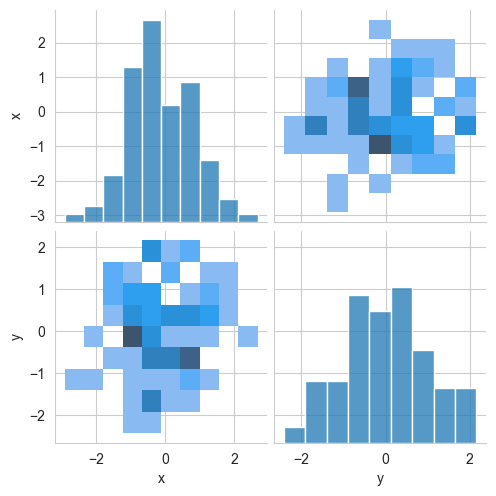

In [72]:
df = pd.DataFrame(draws, columns=['x', 'y'])
sns.pairplot(df, kind='hist') # play with this - try kind='scatter', 'kde', or 'hist'

In the above we have a few different options for the pairplot. In the markdown below, say why you might prefer one over another.

- `kind='scatter'`:
    - good for small data sets
- `kind='hist'`:
    - good for medium sized data sets 
- `kind='kde'`:
    - good for smoothing large data sets, but slow

That expression `cov` is called the *covariance matrix*, and it describes how the two variables are correlated. The diagonal terms of that matrix are the *marginal* variances of the two variables, and the off-diagonal terms are the *covariance* between the two variables. The matrix is always symmetric, and can be written in terms of a correlation coefficient $\rho$:

$$
\text{cov} = \begin{pmatrix} \sigma_1^2 & \rho \sigma_1 \sigma_2 \\ \rho \sigma_1 \sigma_2 & \sigma_2^2 \end{pmatrix}
$$

where $\rho$ is the correlation coefficient, which is always between -1 and 1.

In the next cell, explore 

- what does a multivariate normal look like for $\rho \in (-1, 0.5, 0, 0.5, 1)$?
- how big does the sample have to be to make the correlation apparent?

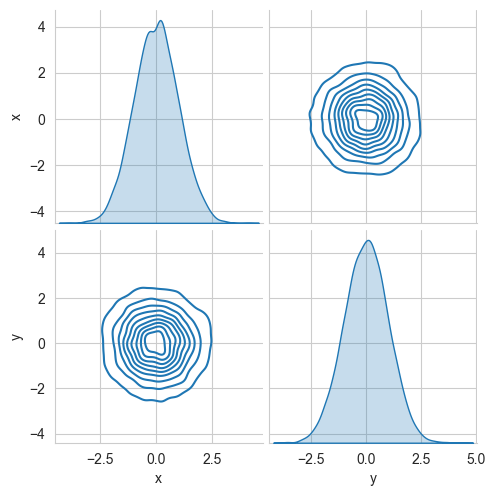

In [73]:
marginals = np.array([1,1])
rho = 0
cov = np.array([[marginals[0]**2, rho*marginals[0]*marginals[1]], [rho*marginals[0]*marginals[1], marginals[1]**2]])
dist = stats.multivariate_normal(mean=mu, cov=cov)
draws = dist.rvs(size=10000, random_state=3)

df = pd.DataFrame(draws, columns=['x', 'y'])
sns.pairplot(df, kind='kde')

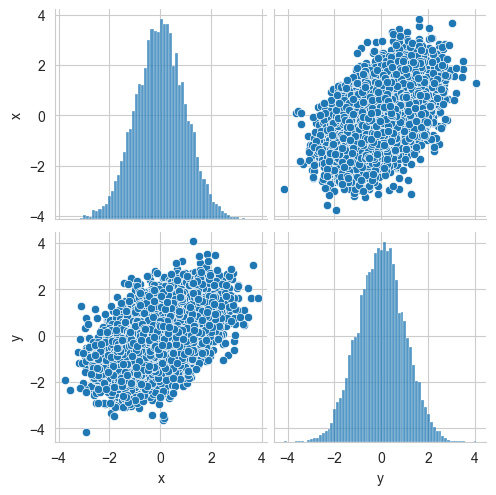

In [74]:
marginals = np.array([1,1])
rho = (0.5)
cov = np.array([[marginals[0]**2, rho*marginals[0]*marginals[1]], [rho*marginals[0]*marginals[1], marginals[1]**2]])
dist = stats.multivariate_normal(mean=mu, cov=cov)
draws = dist.rvs(size=10000, random_state=3)

df = pd.DataFrame(draws, columns=['x', 'y'])
sns.pairplot(df, kind='scatter')

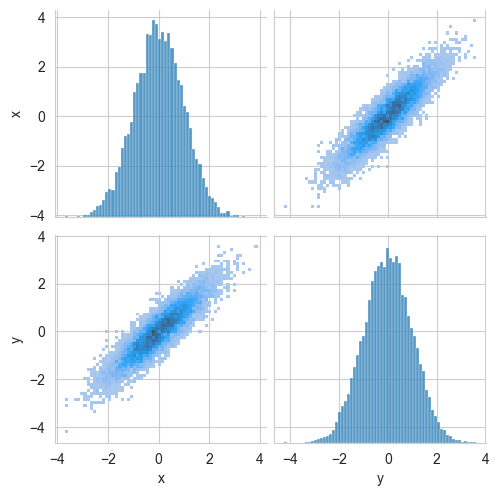

In [75]:
marginals = np.array([1,1])
rho = 0.9
cov = np.array([[marginals[0]**2, rho*marginals[0]*marginals[1]], [rho*marginals[0]*marginals[1], marginals[1]**2]])
dist = stats.multivariate_normal(mean=mu, cov=cov)
draws = dist.rvs(size=10000, random_state=3)

df = pd.DataFrame(draws, columns=['x', 'y'])
sns.pairplot(df, kind='hist')

How do different multivariate distributions look? Visualize a few of these, like the uniform distribution:

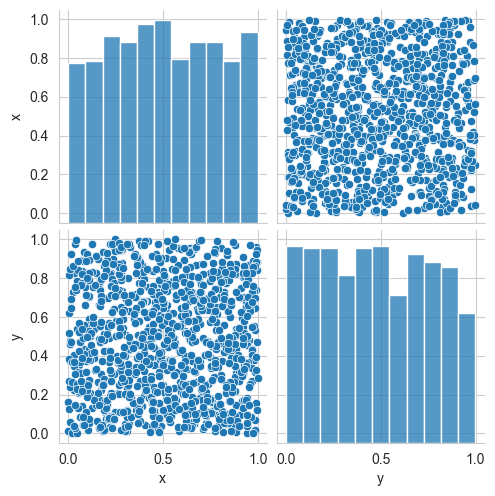

In [76]:
x, y = np.random.rand(2, 1000)
df = pd.DataFrame({'x': x, 'y': y})
sns.pairplot(df)

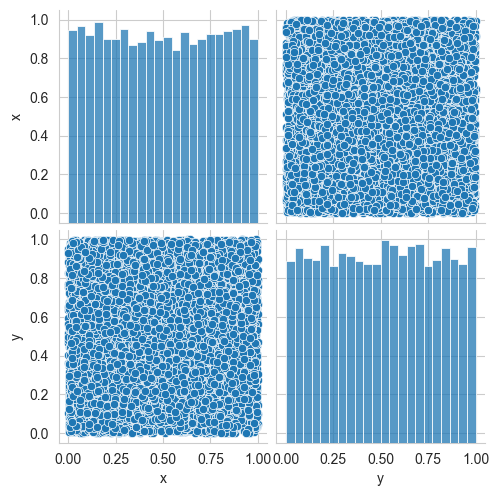

In [77]:
x, y = np.random.rand(2, 10000)
df = pd.DataFrame({'x': x, 'y': y})
sns.pairplot(df)

## Optional Hard Question

If a distribution doesn't have a finite mean and variance, like the Cauchy distriution, the central limit theorem doesn't hold. This is alarmingly common in the real world: so-called "heavy-tailed" distributions are everywhere, from the sizes of earthquakes to the sizes of cities, and you must be aware of them!

What does this look like? You might like to explore what the draws from a Cauchy (or, google it: other heavy-tailed distributions) look like, and how the central limit theorem fails.